Import necessary libraries

In [0]:
import tensorflow as tf
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Flatten
from keras.optimizers import RMSprop
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


Initialization

In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

Load and Test Architecture LSTM 1

Building Model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train Score: 0.51 RMSE
Test Score: 1.84 RMSE
Result for LSTM 1 3250 epochs


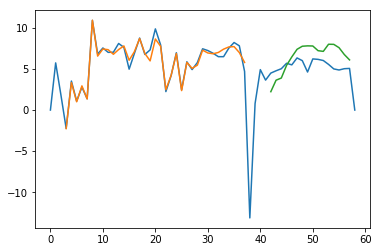

Building Model...
Train Score: 0.52 RMSE
Test Score: 1.82 RMSE
Result for LSTM 1 5000 epochs


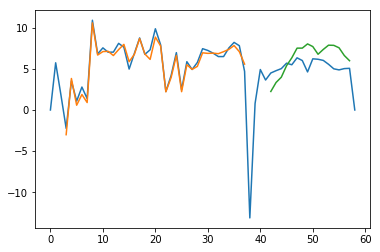

In [0]:
# Dataset Preprocessing
df = pd.read_csv("API_IDN_DS2_en_csv_v2_10516736.csv")
main_df = pd.DataFrame(df)
gdp_df = main_df[main_df['Indicator Code'] == "NY.GDP.MKTP.KD.ZG"]
gdp_df = gdp_df.fillna(0)
gdp_df = gdp_df[gdp_df.columns.drop(list(df.filter(regex='Unnamed')))]
gdp_df = gdp_df.drop(gdp_df.iloc[:, 0:4], axis = 1)
dataset = pd.melt(gdp_df)
dataset = dataset.drop(dataset.columns[0], axis = 1)

# Fix random seed for reproducibility
numpy.random.seed(7)

# Normalizee the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM Network
model = Sequential()
print("Building Model...")
model.add(LSTM(128, input_shape=(trainX.shape[1], look_back), 
              activation='tanh', 
              kernel_initializer='lecun_uniform',
              return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=3250, batch_size=1, verbose=0)

# Make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

print("Result for LSTM 1 3250 epochs")
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#####################

# Epochs 5000

# Dataset Preprocessing
df = pd.read_csv("API_IDN_DS2_en_csv_v2_10516736.csv")
main_df = pd.DataFrame(df)
gdp_df = main_df[main_df['Indicator Code'] == "NY.GDP.MKTP.KD.ZG"]
gdp_df = gdp_df.fillna(0)
gdp_df = gdp_df[gdp_df.columns.drop(list(df.filter(regex='Unnamed')))]
gdp_df = gdp_df.drop(gdp_df.iloc[:, 0:4], axis = 1)
dataset = pd.melt(gdp_df)
dataset = dataset.drop(dataset.columns[0], axis = 1)

# Fix random seed for reproducibility
numpy.random.seed(7)

# Normalizee the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM Network
model = Sequential()
print("Building Model...")
model.add(LSTM(128, input_shape=(trainX.shape[1], look_back), 
              activation='tanh', 
              kernel_initializer='lecun_uniform',
              return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5000, batch_size=1, verbose=0)

# Make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

print("Result for LSTM 1 5000 epochs")
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Load and Test Architecture LSTM 2 (epochs 3250, 5000) without activation function

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Building model...
Train Score: 0.50 RMSE
Test Score: 1.98 RMSE
Result for LSTM 2 3250 epochs without activation function


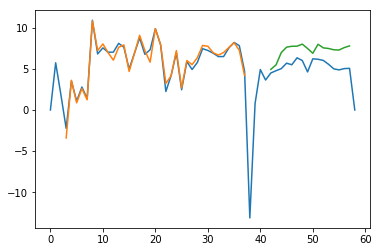

Building model...
Train Score: 0.33 RMSE
Test Score: 1.88 RMSE
Result for LSTM 2 5000 epochs without activation function


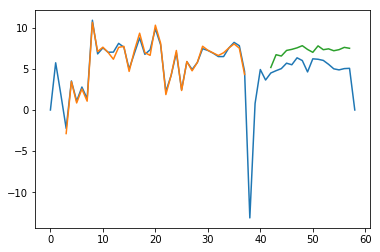

In [0]:
# Dataset Preprocessing
df = pd.read_csv("API_IDN_DS2_en_csv_v2_10516736.csv")
main_df = pd.DataFrame(df)
gdp_df = main_df[main_df['Indicator Code'] == "NY.GDP.MKTP.KD.ZG"]
gdp_df = gdp_df.fillna(0)
gdp_df = gdp_df[gdp_df.columns.drop(list(df.filter(regex='Unnamed')))]
gdp_df = gdp_df.drop(gdp_df.iloc[:, 0:4], axis = 1)
dataset = pd.melt(gdp_df)
dataset = dataset.drop(dataset.columns[0], axis = 1)

# Fix random seed for reproducibility
numpy.random.seed(7)

# Normalizee the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM Network
model = Sequential()
model.add(LSTM(units = 128,
               return_sequences = True, 
               input_shape = (trainX.shape[1], look_back)))
model.add(Dropout(0.1))
model.add(LSTM(units = 64,
               return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 32))
model.add(Dropout(0.1))
model.add(Dense(1))
# model.add(Activation('tanh'))
print("Building model...")
model.compile(optimizer='adam', loss='mean_squared_error') 
model.fit(trainX, trainY, epochs=3250, batch_size=1, verbose=0)

# Make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

print("Result for LSTM 2 3250 epochs without activation function")
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#####################

# Epochs 5000

# Dataset Preprocessing
df = pd.read_csv("API_IDN_DS2_en_csv_v2_10516736.csv")
main_df = pd.DataFrame(df)
gdp_df = main_df[main_df['Indicator Code'] == "NY.GDP.MKTP.KD.ZG"]
gdp_df = gdp_df.fillna(0)
gdp_df = gdp_df[gdp_df.columns.drop(list(df.filter(regex='Unnamed')))]
gdp_df = gdp_df.drop(gdp_df.iloc[:, 0:4], axis = 1)
dataset = pd.melt(gdp_df)
dataset = dataset.drop(dataset.columns[0], axis = 1)

# Fix random seed for reproducibility
numpy.random.seed(7)

# Normalizee the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM Network
model = Sequential()
model.add(LSTM(units = 128,
               return_sequences = True, 
               input_shape = (trainX.shape[1], look_back)))
model.add(Dropout(0.1))
model.add(LSTM(units = 64,
               return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 32))
model.add(Dropout(0.1))
model.add(Dense(1))
# model.add(Activation('tanh'))
print("Building model...")
model.compile(optimizer='adam', loss='mean_squared_error') 
model.fit(trainX, trainY, epochs=5000, batch_size=1, verbose=0)

# Make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

print("Result for LSTM 2 5000 epochs without activation function")
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Load and Test Architecture LSTM 2 (epoch 3250, 5000) with activation function

Building model...
Train Score: 0.66 RMSE
Test Score: 1.13 RMSE
Result for LSTM 1 3250 epochs with activation function


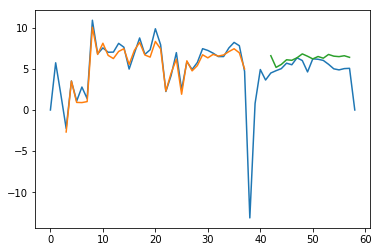

Building model...
Train Score: 0.24 RMSE
Test Score: 2.12 RMSE
Result for LSTM 2 5000 epochs with activation function


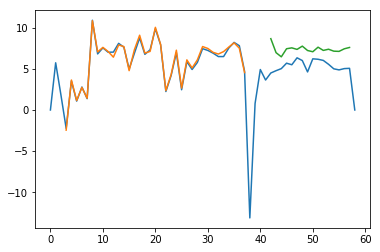

In [0]:
# Dataset Preprocessing
df = pd.read_csv("API_IDN_DS2_en_csv_v2_10516736.csv")
main_df = pd.DataFrame(df)
gdp_df = main_df[main_df['Indicator Code'] == "NY.GDP.MKTP.KD.ZG"]
gdp_df = gdp_df.fillna(0)
gdp_df = gdp_df[gdp_df.columns.drop(list(df.filter(regex='Unnamed')))]
gdp_df = gdp_df.drop(gdp_df.iloc[:, 0:4], axis = 1)
dataset = pd.melt(gdp_df)
dataset = dataset.drop(dataset.columns[0], axis = 1)

# Fix random seed for reproducibility
numpy.random.seed(7)

# Normalizee the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM Network
model = Sequential()
model.add(LSTM(units = 128,
               return_sequences = True, 
               input_shape = (trainX.shape[1], look_back)))
model.add(Dropout(0.1))
model.add(LSTM(units = 64,
               return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 32))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('tanh'))
print("Building model...")
model.compile(optimizer='adam', loss='mean_squared_error') 
model.fit(trainX, trainY, epochs=3250, batch_size=1, verbose=0)

# Make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

print("Result for LSTM 1 3250 epochs with activation function")
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#####################

# Epochs 5000

# Dataset Preprocessing
df = pd.read_csv("API_IDN_DS2_en_csv_v2_10516736.csv")
main_df = pd.DataFrame(df)
gdp_df = main_df[main_df['Indicator Code'] == "NY.GDP.MKTP.KD.ZG"]
gdp_df = gdp_df.fillna(0)
gdp_df = gdp_df[gdp_df.columns.drop(list(df.filter(regex='Unnamed')))]
gdp_df = gdp_df.drop(gdp_df.iloc[:, 0:4], axis = 1)
dataset = pd.melt(gdp_df)
dataset = dataset.drop(dataset.columns[0], axis = 1)

# Fix random seed for reproducibility
numpy.random.seed(7)

# Normalizee the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM Network
model = Sequential()
model.add(LSTM(units = 128,
               return_sequences = True, 
               input_shape = (trainX.shape[1], look_back)))
model.add(Dropout(0.1))
model.add(LSTM(units = 64,
               return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 32))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('tanh'))
print("Building model...")
model.compile(optimizer='adam', loss='mean_squared_error') 
model.fit(trainX, trainY, epochs=5000, batch_size=1, verbose=0)

# Make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

print("Result for LSTM 2 5000 epochs with activation function")
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Load and Test Architecture 3 (epochs 3250, 5000) without Activation function

Building model...
Train Score: 0.87 RMSE
Test Score: 1.22 RMSE
Result for LSTM 3 3250 epochs without activation function


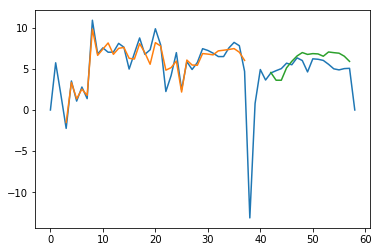

Building model...
Train Score: 0.66 RMSE
Test Score: 1.62 RMSE
Result for LSTM 3 5000 epochs without activation function


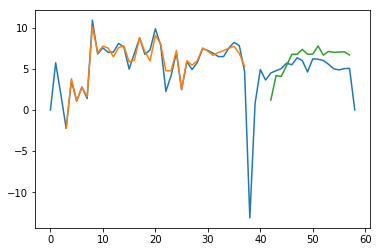

In [6]:
# Dataset Preprocessing
df = pd.read_csv("API_IDN_DS2_en_csv_v2_10516736.csv")
main_df = pd.DataFrame(df)
gdp_df = main_df[main_df['Indicator Code'] == "NY.GDP.MKTP.KD.ZG"]
gdp_df = gdp_df.fillna(0)
gdp_df = gdp_df[gdp_df.columns.drop(list(df.filter(regex='Unnamed')))]
gdp_df = gdp_df.drop(gdp_df.iloc[:, 0:4], axis = 1)
dataset = pd.melt(gdp_df)
dataset = dataset.drop(dataset.columns[0], axis = 1)

# Fix random seed for reproducibility
numpy.random.seed(7)

# Normalizee the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM Network
model = Sequential()
model.add(LSTM(units = 32,
               return_sequences = True, 
               input_shape = (trainX.shape[1], look_back)))
model.add(Dropout(0.1))
model.add(LSTM(units = 16,
               return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 4))
model.add(Dropout(0.1))
model.add(Dense(1))
# model.add(Activation('tanh'))
print("Building model...")
model.compile(optimizer='adam', loss='mean_squared_error') 
model.fit(trainX, trainY, epochs=3250, batch_size=1, verbose=0)

# Make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

print("Result for LSTM 3 3250 epochs without activation function")
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#####################

# Epochs 5000

# Dataset Preprocessing
df = pd.read_csv("API_IDN_DS2_en_csv_v2_10516736.csv")
main_df = pd.DataFrame(df)
gdp_df = main_df[main_df['Indicator Code'] == "NY.GDP.MKTP.KD.ZG"]
gdp_df = gdp_df.fillna(0)
gdp_df = gdp_df[gdp_df.columns.drop(list(df.filter(regex='Unnamed')))]
gdp_df = gdp_df.drop(gdp_df.iloc[:, 0:4], axis = 1)
dataset = pd.melt(gdp_df)
dataset = dataset.drop(dataset.columns[0], axis = 1)

# Fix random seed for reproducibility
numpy.random.seed(7)

# Normalizee the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM Network
model = Sequential()
model.add(LSTM(units = 32,
               return_sequences = True, 
               input_shape = (trainX.shape[1], look_back)))
model.add(Dropout(0.1))
model.add(LSTM(units = 16,
               return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 4))
model.add(Dropout(0.1))
model.add(Dense(1))
# model.add(Activation('tanh'))
print("Building model...")
model.compile(optimizer='adam', loss='mean_squared_error') 
model.fit(trainX, trainY, epochs=5000, batch_size=1, verbose=0)

# Make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

print("Result for LSTM 3 5000 epochs without activation function")
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Load and Test Architecture 3 (epochs 3250, 5000) with Activation function

In [0]:
# Dataset Preprocessing
df = pd.read_csv("API_IDN_DS2_en_csv_v2_10516736.csv")
main_df = pd.DataFrame(df)
gdp_df = main_df[main_df['Indicator Code'] == "NY.GDP.MKTP.KD.ZG"]
gdp_df = gdp_df.fillna(0)
gdp_df = gdp_df[gdp_df.columns.drop(list(df.filter(regex='Unnamed')))]
gdp_df = gdp_df.drop(gdp_df.iloc[:, 0:4], axis = 1)
dataset = pd.melt(gdp_df)
dataset = dataset.drop(dataset.columns[0], axis = 1)

# Fix random seed for reproducibility
numpy.random.seed(7)

# Normalizee the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM Network
model = Sequential()
model.add(LSTM(units = 32,
               return_sequences = True, 
               input_shape = (trainX.shape[1], look_back)))
model.add(Dropout(0.1))
model.add(LSTM(units = 16,
               return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 4))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('tanh'))
print("Building model...")
model.compile(optimizer='adam', loss='mean_squared_error') 
model.fit(trainX, trainY, epochs=3250, batch_size=1, verbose=0)

# Make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

print("Result for LSTM 3 3250 epochs with activation function")
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#####################

# Epochs 5000

# Dataset Preprocessing
df = pd.read_csv("API_IDN_DS2_en_csv_v2_10516736.csv")
main_df = pd.DataFrame(df)
gdp_df = main_df[main_df['Indicator Code'] == "NY.GDP.MKTP.KD.ZG"]
gdp_df = gdp_df.fillna(0)
gdp_df = gdp_df[gdp_df.columns.drop(list(df.filter(regex='Unnamed')))]
gdp_df = gdp_df.drop(gdp_df.iloc[:, 0:4], axis = 1)
dataset = pd.melt(gdp_df)
dataset = dataset.drop(dataset.columns[0], axis = 1)

# Fix random seed for reproducibility
numpy.random.seed(7)

# Normalizee the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM Network
model = Sequential()
model.add(LSTM(units = 32,
               return_sequences = True, 
               input_shape = (trainX.shape[1], look_back)))
model.add(Dropout(0.1))
model.add(LSTM(units = 16,
               return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 4))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('tanh'))
print("Building model...")
model.compile(optimizer='adam', loss='mean_squared_error') 
model.fit(trainX, trainY, epochs=5000, batch_size=1, verbose=0)

# Make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

print("Result for LSTM 3 5000 epochs with activation function")
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Building model...
